In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [4]:
@model pitch_rate begin
    @parameter begin
        I_ENG2Fr_ENG_mount = 0
        I_ENG2Rr_ENG_mount = -0.4
        i_center_ENG = 100 #ここで指定しなくてもいいが、パラメーターとして認識されない(現在は初期値)
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "pitch_rate") #シート名も指定して
end

#warningが出るなら繋がっていないポートがある(addブロックなどで使わないポートを削除すればでない)


┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "AkBECwPEjsAAM7BC-o17-15", "parent" => "AkBECwPEjsAAM7BC-o17-10", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "AkBECwPEjsAAM7BC-o17-14", "parent" => "AkBECwPEjsAAM7BC-o17-10", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76


pitch_rate (generic function with 1 method)

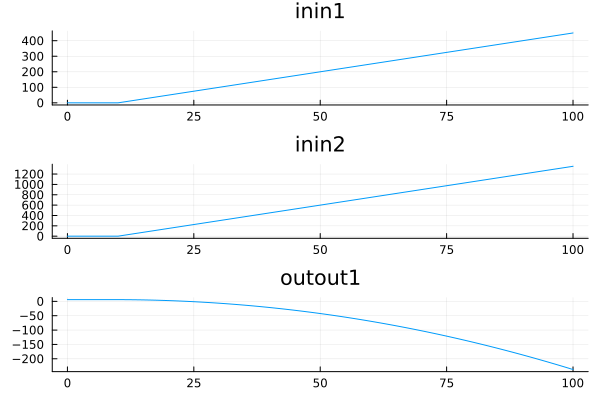

In [5]:
@model Test_pitch_rate begin

    @block begin
        p = pitch_rate()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.in1  #in1のポート名を変えたのならその名前にしないといけない(p.F_ENG_MNT_F2ENG_N)
        ramp2.out => p.in2
    end
    @scope begin
        p.in1 => inin1  #(p.F_ENG_MNT_F2ENG_N)
        p.in2 => inin2
        p.out1 => outout1 #(p.omg_ENG_pitch_rate_radps)
    end
end

#m = @compile Test_pitch_rate()  #i_center_ENG = 1000 モデルを作成するときに値を決めることもできる(書き換える)
m = @compile Test_pitch_rate()
res = simulate(m, tspan=[0, 100])
plot(res)

In [6]:
@model v_z_carbody begin
    @parameter begin
        M_ENG = 50
        g = 9.8
    end
    @xmlmodel("oldMETI_Vertical_Vibration.drawio", "v_z_carbody")
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "YrXGAj2qAduXaS2KI1x2-13", "parent" => "YrXGAj2qAduXaS2KI1x2-8", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76


v_z_carbody (generic function with 1 method)

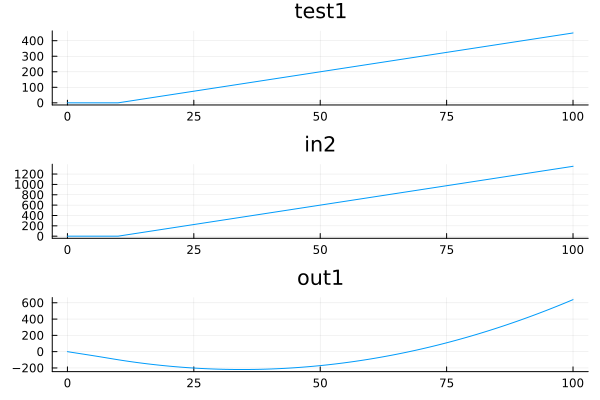

In [7]:
@model Test_v_z_carbody begin
    @block begin
        p = v_z_carbody()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.in1
        ramp2.out => p.in2
    end
    @scope begin
        p.in1 => test1
        p.in2 => in2
        p.out1 => out1
    end
end

m = @compile Test_v_z_carbody()
res = simulate(m, tspan=[0, 100])
plot(res)

In [8]:
@model z_velocity begin
    @parameter begin
        I_ENG2Fr_ENG_mount = 0
        I_ENG2Rr_ENG_mount = -0.4
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "z_velocity")
end

z_velocity (generic function with 1 method)

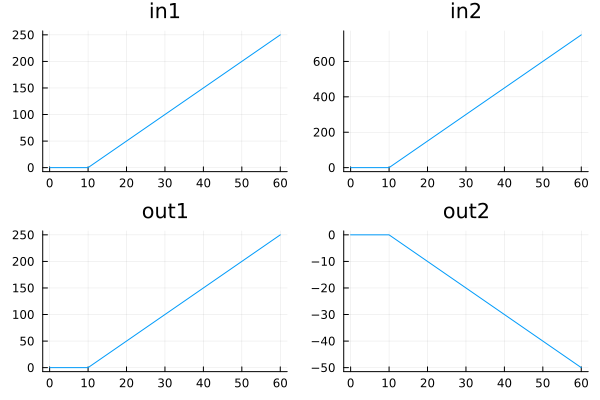

In [12]:
@model Test_z_velocity begin
    @block begin
        p = z_velocity()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.in1
        ramp2.out => p.in2
    end
    @scope begin
        p.in1 => in1
        p.in2 => in2
        p.out1 => out1
        p.out2 => out2
    end
end

m = @compile Test_z_velocity()
result = simulate(m, tspan=(0.0, 60.0));
plot(result, layout=(2,2))


In [ ]:
@buildxml "nanndemoiinamae" pitch_rate v_z_carbody z_velocity  #使うモデル群を書き連ねる
##実行したらファイルができる
#->draw.ioでそのファイルをimport
#->ファイル名のブロック群のタブが出てくる、それを用いる

In [ ]:
#名前が変わっているがこれ

In [13]:
@model HM_F_PNT begin
    @xmlmodel("METI_Vertical_Vibration.drawio", "ENG_PNT")
end

HM_F_PNT (generic function with 1 method)

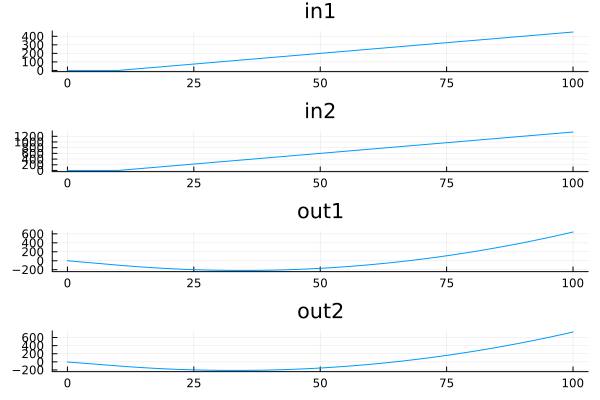

In [14]:
@model TestHM_F_PNT begin
    @block begin
        m = HM_F_PNT()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => m.in1
        ramp2.out => m.in2
    end
    @scope begin
        m.in1 => in1
        m.in2 => in2
        m.out1 => out1
        m.out2 => out2
    end
end

m = @compile TestHM_F_PNT()
res = simulate(m, tspan=[0, 100])
plot(res)